# Site 734 correlations
This notebook plots the correlation of codon counts at site 734 between libraries

## Notebook setup
Imports

In [1]:
import itertools
import pandas as pd
import plotnine as p9

# print imports and versions
# copied from https://stackoverflow.com/questions/40428931/package-for-listing-version-of-packages-used-in-a-jupyter-notebook
print('\n'.join(f'{m.__name__}=={m.__version__}' \
                for m in globals().values() if getattr(m, '__version__', None)))

pandas==0.25.3
plotnine==0.6.0


Input data

In [2]:
site_734_counts = '../results/site_734/site_734_counts.csv'
wt_codon = "GAT"

Output data

In [3]:
site_734_dir = '../results/site_734/'

Notebook aesthetics

In [4]:
p9.theme_set(p9.theme_classic())
CBPALETTE_RICH = ['#648FFF', '#FFB000', '#DC267F', '#785EF0', '#FE6100']

## Load data
Load site 734 frequencies

In [5]:
codon_counts = pd.read_csv(site_734_counts)
display(codon_counts)

,codon,count,library,name,site,sorted,source,stage,wildtype,letter
0,AAC,0.000000,wt,wt-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,N
1,AAC,33.000000,wt,wt-gDNA-noStage-notSorted,734,notSorted,gDNA,noStage,GAT,N
2,AAC,129.000000,lib1,lib1-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,N
3,AAC,54.000000,lib2,lib2-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,N
4,AAC,83.000000,lib3,lib3-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,N
...,...,...,...,...,...,...,...,...,...,...
479,TAC,74.000000,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,Y
480,TGA,85.333333,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,O
481,TGC,67.666667,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,C
482,TGG,83.000000,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,W


In [6]:
codon_counts['name'].unique()

array(['wt-plasmid-noStage-notSorted', 'wt-gDNA-noStage-notSorted',
       'lib1-plasmid-noStage-notSorted', 'lib2-plasmid-noStage-notSorted',
       'lib3-plasmid-noStage-notSorted', 'lib1-gDNA-early-notSorted',
       'lib2-gDNA-early-notSorted', 'lib3-gDNA-early-notSorted',
       'lib1-gDNA-mid-notSorted', 'lib2-gDNA-mid-notSorted',
       'lib3-gDNA-mid-notSorted', 'lib1-gDNA-late-notSorted',
       'lib2-gDNA-late-notSorted', 'lib3-gDNA-late-notSorted',
       'lib1-gDNA-late-sorted', 'lib2-gDNA-late-sorted',
       'lib3-gDNA-late-sorted', 'mean-gDNA-early-notSorted',
       'mean-gDNA-late-notSorted', 'mean-gDNA-late-sorted',
       'mean-gDNA-mid-notSorted', 'mean-plasmid-noStage-notSorted'],
      dtype=object)

In [7]:
codon_counts_wide = (
    codon_counts
    .pivot(index='codon',
           columns='name',
           values='count'))
display(codon_counts_wide)

name,lib1-gDNA-early-notSorted,lib1-gDNA-late-notSorted,lib1-gDNA-late-sorted,lib1-gDNA-mid-notSorted,lib1-plasmid-noStage-notSorted,lib2-gDNA-early-notSorted,lib2-gDNA-late-notSorted,lib2-gDNA-late-sorted,lib2-gDNA-mid-notSorted,lib2-plasmid-noStage-notSorted,...,lib3-gDNA-late-sorted,lib3-gDNA-mid-notSorted,lib3-plasmid-noStage-notSorted,mean-gDNA-early-notSorted,mean-gDNA-late-notSorted,mean-gDNA-late-sorted,mean-gDNA-mid-notSorted,mean-plasmid-noStage-notSorted,wt-gDNA-noStage-notSorted,wt-plasmid-noStage-notSorted
codon,,,,,,,,,,,,,,,,,,,,,
AAC,82.0,38.0,32.0,47.0,129.0,85.0,70.0,37.0,49.0,54.0,...,20.0,72.0,83.0,81.333333,53.666667,29.666667,56.000000,88.666667,33.0,0.0
AAG,88.0,59.0,71.0,126.0,64.0,71.0,16.0,64.0,216.0,65.0,...,36.0,56.0,88.0,76.666667,42.666667,57.000000,132.666667,72.333333,0.0,0.0
ACC,55.0,27.0,49.0,222.0,91.0,57.0,89.0,28.0,112.0,72.0,...,0.0,96.0,54.0,51.000000,68.333333,25.666667,143.333333,72.333333,92.0,0.0
AGA,58.0,91.0,33.0,145.0,85.0,62.0,152.0,70.0,105.0,65.0,...,17.0,19.0,100.0,53.333333,94.000000,40.000000,89.666667,83.333333,34.0,0.0
AGC,148.0,12.0,40.0,88.0,52.0,6.0,146.0,39.0,110.0,61.0,...,47.0,69.0,75.0,68.666667,84.333333,42.000000,89.000000,62.666667,79.0,0.0
ATC,69.0,151.0,65.0,68.0,108.0,69.0,132.0,35.0,15.0,38.0,...,112.0,29.0,106.0,65.000000,138.666667,70.666667,37.333333,84.000000,0.0,0.0
ATG,205.0,147.0,44.0,95.0,93.0,157.0,77.0,77.0,190.0,93.0,...,26.0,34.0,93.0,136.000000,131.333333,49.000000,106.333333,93.000000,29.0,0.0
CAC,85.0,164.0,29.0,139.0,77.0,40.0,53.0,31.0,153.0,53.0,...,12.0,36.0,64.0,61.333333,105.333333,24.000000,109.333333,64.666667,25.0,0.0
CAG,181.0,58.0,73.0,290.0,181.0,108.0,150.0,73.0,184.0,102.0,...,68.0,117.0,110.0,135.666667,122.000000,71.333333,197.000000,131.000000,15.0,0.0


## Plot correlations
First, define function to plot correlations.

In [8]:
def plot_correlation(input_df, lib_a, lib_b, source, stage, sort_status):
    r_value = (
        input_df
        .query(f'codon != "{wt_codon}"')
        [[f"{lib_a}-{source}-{stage}-{sort_status}",
          f"{lib_b}-{source}-{stage}-{sort_status}"]]
        .corr()
        .iloc[0,-1])
    plot = (
        p9.ggplot((input_df
                  .query(f'codon != "{wt_codon}"')),
                  p9.aes(x=f"{lib_a}-{source}-{stage}-{sort_status}",
                         y=f"{lib_b}-{source}-{stage}-{sort_status}")) +
        p9.geom_point(alpha=0.5) +
        p9.labs(x=f'{lib_a}',
                y=f'{lib_b}') +
        p9.ggtitle(f"{source} {stage} {sort_status}\nMutant Library Correlation") +
        p9.annotate('text',
                    x=.2*(input_df
                          .query(f'codon != "{wt_codon}"')
                          [f"{lib_a}-{source}-{stage}-{sort_status}"]
                          .max()),
                    y=(input_df
                          .query(f'codon != "{wt_codon}"')
                          [f"{lib_b}-{source}-{stage}-{sort_status}"]
                          .max()),
                    label=f'r = {r_value:.2g}') +
        p9.theme(figure_size=(3, 3)))
    return plot

Make list of libs to iterate through:

In [9]:
libs = ['lib1', 'lib2', 'lib3']
pairs = list(itertools.combinations(libs, 2))

## Plot plasmid correlations

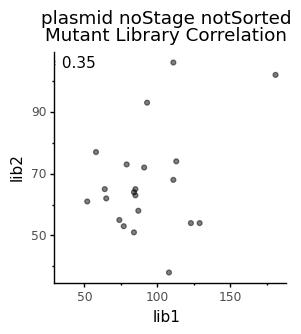

<ggplot: (8764652568381)>

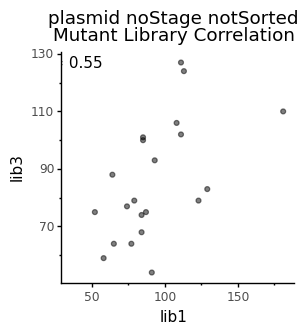

<ggplot: (8763788718973)>

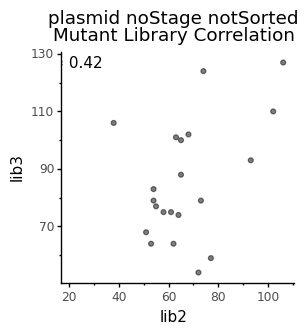

<ggplot: (8764652568381)>

In [10]:
source = "plasmid"
stage = "noStage"
sort_status = "notSorted"

for pair in pairs:
    lib_a=pair[0]
    lib_b=pair[1]
    plot = plot_correlation(codon_counts_wide,
                            lib_a,
                            lib_b,
                            source,
                            stage,
                            sort_status)
    display(plot)

## Plot Early Correlations

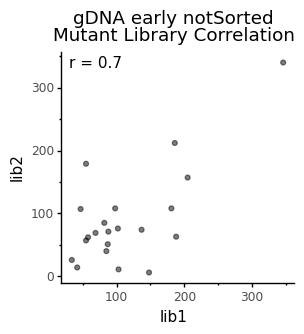

<ggplot: (8763788264365)>

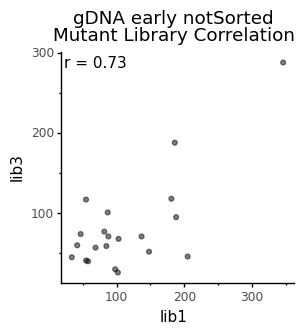

<ggplot: (8763797156713)>

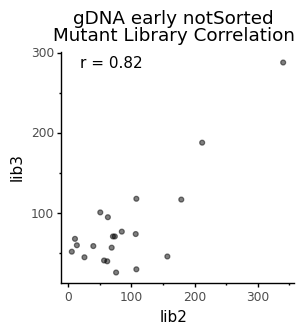

<ggplot: (8763788246961)>

In [11]:
source = "gDNA"
stage = "early"
sort_status = "notSorted"

for pair in pairs:
    lib_a=pair[0]
    lib_b=pair[1]
    plot = plot_correlation(codon_counts_wide,
                            lib_a,
                            lib_b,
                            source,
                            stage,
                            sort_status)
    display(plot)

## Plot Mid Correlations

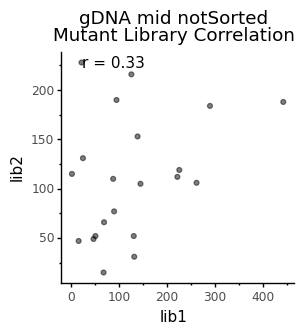

<ggplot: (8763788262605)>

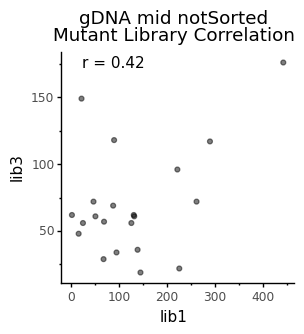

<ggplot: (8763788258621)>

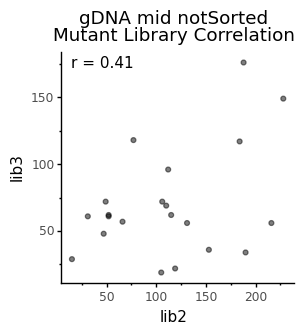

<ggplot: (8763788100781)>

In [12]:
source = "gDNA"
stage = "mid"
sort_status = "notSorted"

for pair in pairs:
    lib_a=pair[0]
    lib_b=pair[1]
    plot = plot_correlation(codon_counts_wide,
                            lib_a,
                            lib_b,
                            source,
                            stage,
                            sort_status)
    display(plot)

## Plot Late Not-Sorted Correlations

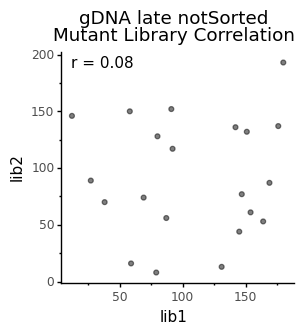

<ggplot: (8763788117509)>

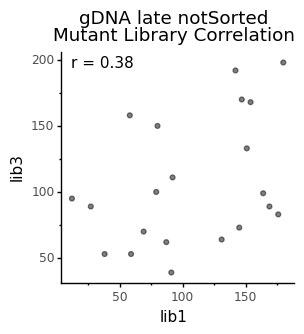

<ggplot: (8763788076733)>

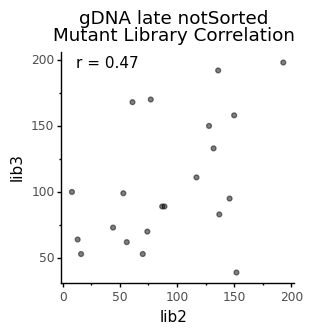

<ggplot: (8763788068281)>

In [13]:
source = "gDNA"
stage = "late"
sort_status = "notSorted"

for pair in pairs:
    lib_a=pair[0]
    lib_b=pair[1]
    plot = plot_correlation(codon_counts_wide,
                            lib_a,
                            lib_b,
                            source,
                            stage,
                            sort_status)
    display(plot)

## Plot Late Sorted Correlations

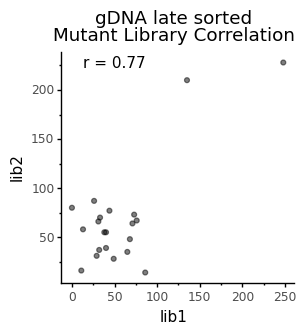

<ggplot: (8763788085133)>

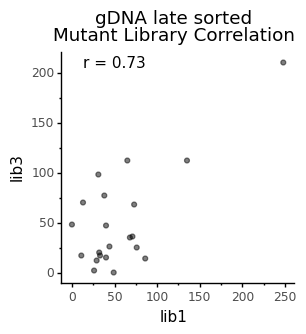

<ggplot: (8763788012297)>

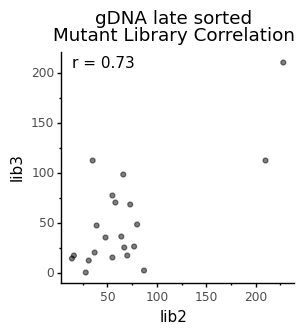

<ggplot: (8763788719053)>

In [14]:
source = "gDNA"
stage = "late"
sort_status = "sorted"

for pair in pairs:
    lib_a=pair[0]
    lib_b=pair[1]
    plot = plot_correlation(codon_counts_wide,
                            lib_a,
                            lib_b,
                            source,
                            stage,
                            sort_status)
    display(plot)

Interpretation: Early sample has best correlations. Late Sorted sample, in particular has extreme separation of a few codons.